## Assignment 1
### Problem Statement C
### Dataset: IMDB.csv

https://drive.google.com/file/d/1fQYedyo5KGYT6g6v5dJKnO9qOuJ8q4M8/view?usp=sharing

## Group 97

1. Student 1: PEYALA SAMARASIMHA REDDY ID: 2023AA05072
2. Student 2: PEGALLAPATI SAI MAHARSHI ID: 2023AA05924
3. Student 3: CHADALAWADA VISWANATH HEMANTH ID: 2023AA05195
4. Student 4: SIGINAM SIVASAI ID: 2023AA05371

## Problem Statement:
The goal of Part I of the task is to use raw textual data in language models for recommendation
based application. 

The goal of Part II of task is to implement comprehensive preprocessing steps for a given
dataset, enhancing the quality and relevance of the textual information. The preprocessed text
is then transformed into a feature-rich representation using a chosen vectorization method for
further use in the application to perform similarity analysis.

# Part I
### Sentence comparison using N-gram: (3 Marks)

Let a search engine powered by language model recommend which of the below
sentences are most relevant w.r.t to given training corpus. Design a probabilistic language
model to compare below test sentences for recommendation using bigram. Use all the instances
in the dataset as a training corpus.

Test Sentence 1: “Petter Mattei's 'Love in the Time of Money' is a visually stunning film to
watch.”

Test Sentence 2: “I sure would like to see a resurrection of an updated Seahunt series with the
tech they have today”

In [1]:
# Importing necessary libraries, packages
import pandas as pd
import re
import nltk
from collections import defaultdict, Counter
from nltk.util import bigrams
from nltk.probability import ConditionalFreqDist, ConditionalProbDist, MLEProbDist;

In [2]:
# Load the dataset
file_path = "IMDB.csv"
df = pd.read_csv(file_path)

# Printing the dataset
df

,ID,review
0,1,One of the other reviewers has mentioned that ...
1,2,A wonderful little production. <br /><br />The...
2,3,I thought this was a wonderful way to spend ti...
3,4,Basically there's a family where a little boy ...
4,5,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...,...
615,616,It starts out like a very serious social comme...
616,617,This is my first Deepa Mehta film. I saw the f...
617,618,"All the way though i was thinking to myself ""O..."
618,619,"At 2:37, a high school student commits suicide..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      620 non-null    int64 
 1   review  620 non-null    object
dtypes: int64(1), object(1)
memory usage: 9.8+ KB


In [4]:
import re
import nltk

def preprocess_text(text):
    text = re.sub(r'<[^>]+>', ' ', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.strip()  # Strip extra spaces from the beginning and end
    tokens = nltk.word_tokenize(text.lower())  # Tokenize and convert to lowercase
    return tokens

df['cleaned_review'] = df['review'].apply(preprocess_text)


df

,ID,review,cleaned_review
0,1,One of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,2,A wonderful little production. <br /><br />The...,"[a, wonderful, little, production, the, filmin..."
2,3,I thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,..."
3,4,Basically there's a family where a little boy ...,"[basically, theres, a, family, where, a, littl..."
4,5,"Petter Mattei's ""Love in the Time of Money"" is...","[petter, matteis, love, in, the, time, of, mon..."
...,...,...,...
615,616,It starts out like a very serious social comme...,"[it, starts, out, like, a, very, serious, soci..."
616,617,This is my first Deepa Mehta film. I saw the f...,"[this, is, my, first, deepa, mehta, film, i, s..."
617,618,"All the way though i was thinking to myself ""O...","[all, the, way, though, i, was, thinking, to, ..."
618,619,"At 2:37, a high school student commits suicide...","[at, 237, a, high, school, student, commits, s..."


In [5]:
# Build bigram language model
bigram_counts = defaultdict(Counter)

for tokens in df['cleaned_review']:
    for i in range(len(tokens) - 1):
        bigram_counts[tokens[i]][tokens[i+1]] += 1

# Convert bigram counts to probabilities
bigram_probabilities = defaultdict(dict)

for word, counter in bigram_counts.items():
    total_count = sum(counter.values())
    for next_word, count in counter.items():
        bigram_probabilities[word][next_word] = count / total_count

In [6]:
# Calculate sentence probability using bigram model
def calculate_sentence_probability(sentence, bigram_probabilities):
    tokens = preprocess_text(sentence)
    probability = 1.0
    
    for i in range(len(tokens) - 1):
        word, next_word = tokens[i], tokens[i + 1]
        if word in bigram_probabilities and next_word in bigram_probabilities[word]:
            probability *= bigram_probabilities[word][next_word]
        else:
            probability *= 1e-6  # Smoothing for unseen bigrams
    
    return probability

In [7]:
# Test sentences
test_sentence1 = "Petter Mattei's 'Love in the Time of Money' is a visually stunning film to watch."
test_sentence2 = "I sure would like to see a resurrection of an updated Seahunt series with the tech they have today"

# Calculate probabilities
prob_sentence1 = calculate_sentence_probability(test_sentence1, bigram_probabilities)
prob_sentence2 = calculate_sentence_probability(test_sentence2, bigram_probabilities)

print(f"Probability of Test Sentence 1: {prob_sentence1}")
print(f"Probability of Test Sentence 2: {prob_sentence2}")

# Determine the most relevant sentence
if prob_sentence1 > prob_sentence2:
    print("Test Sentence 1 is more relevant.")
else:
    print("Test Sentence 2 is more relevant.")

Probability of Test Sentence 1: 2.8922853429260387e-21
Probability of Test Sentence 2: 3.93609121149225e-40
Test Sentence 1 is more relevant.


Based on above designed probabilistic language model results, the Test Sentence 1: “Petter Mattei's 'Love in the Time of Money' is a visually stunning film to watch.” is most recommended 

# Part II
Perform the below sequential tasks on the given dataset. <br>
### i) Text Preprocessing: (2 Marks) 
a. Tokenization <br>
b. Lowercasing <br>
c. Stop Words Removal <br>
d. Stemming <br>
e. Lemmatization <br>

In [8]:
import re
import nltk

# Loading the dataset freshly
file_path = "IMDB.csv"
df = pd.read_csv(file_path)

df

,ID,review
0,1,One of the other reviewers has mentioned that ...
1,2,A wonderful little production. <br /><br />The...
2,3,I thought this was a wonderful way to spend ti...
3,4,Basically there's a family where a little boy ...
4,5,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...,...
615,616,It starts out like a very serious social comme...
616,617,This is my first Deepa Mehta film. I saw the f...
617,618,"All the way though i was thinking to myself ""O..."
618,619,"At 2:37, a high school student commits suicide..."


In [9]:
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', ' ', text)
    # Remove punctuation and lowercasing
    text = re.sub(r'[^\w\s]', '', text).lower()
    # Strip extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Stop Words Removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply preprocessing function to 'review' column and create 'cleaned_review' column
df['cleaned_review'] = df['review'].apply(preprocess_text)

# Stemming and Lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Functions for stemming and lemmatization
def stem_and_lemmatize(tokens):
    stemmed = [stemmer.stem(token) for token in tokens]
    lemmatized = [lemmatizer.lemmatize(token) for token in stemmed]
    return lemmatized

# Apply stemming and lemmatization to 'cleaned_review' column and create 'processed_review' column
df['processed_review'] = df['cleaned_review'].apply(stem_and_lemmatize)

# Display the DataFrame with cleaned and processed reviews
df

,ID,review,cleaned_review,processed_review
0,1,One of the other reviewers has mentioned that ...,"[one, reviewers, mentioned, watching, 1, oz, e...","[one, review, mention, watch, 1, oz, episod, y..."
1,2,A wonderful little production. <br /><br />The...,"[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass..."
2,3,I thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe..."
3,4,Basically there's a family where a little boy ...,"[basically, theres, family, little, boy, jake,...","[basic, there, famili, littl, boy, jake, think..."
4,5,"Petter Mattei's ""Love in the Time of Money"" is...","[petter, matteis, love, time, money, visually,...","[petter, mattei, love, time, money, visual, st..."
...,...,...,...,...
615,616,It starts out like a very serious social comme...,"[starts, like, serious, social, commentary, qu...","[start, like, seriou, social, commentari, quic..."
616,617,This is my first Deepa Mehta film. I saw the f...,"[first, deepa, mehta, film, saw, film, tv, hin...","[first, deepa, mehta, film, saw, film, tv, hin..."
617,618,"All the way though i was thinking to myself ""O...","[way, though, thinking, oh, god, beginning, th...","[way, though, think, oh, god, begin, thought, ..."
618,619,"At 2:37, a high school student commits suicide...","[237, high, school, student, commits, suicide,...","[237, high, school, student, commit, suicid, s..."


### ii) Feature Extraction: (2 Marks) 
Use the pre-processed data from previous step and implement the below vectorization methods to extract features.
#### Word Embedding using TD-IDF

In [10]:
df['processed_review_text'] = df['processed_review'].apply(lambda x: ' '.join(x))

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_review_text'])

# Convert sparse matrix to DataFrame for better readability 
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display TF-IDF matrix
tfidf_df

,007,02,0510,10,100,1000,10000,100000,10002000,100th,...,zoey,zombi,zombievers,zone,zoo,zoom,zucker,zulu,zwick,ísnt
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.072334,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.210097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
616,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
617,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
618,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### iii) Similarity Analysis: (3 Marks)
Use the vectorized representation from previous step and implement a method to identify and print the names of top two similar words that exhibit significant similarity. Justify your choice of similarity metric and feature design. Visualize a subset of vector embedding in 2D semantic space suitable for this use case. HINT: (Use PCA for Dimensionality reduction)

In [11]:
from sklearn.metrics.pairwise import cosine_similarity  # Add this import
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [12]:
cosine_similarities = cosine_similarity(tfidf_matrix.T)  # Transpose to get word similarities

np.fill_diagonal(cosine_similarities, -np.inf)  # Excluding self-similarity
indices = np.unravel_index(np.argsort(cosine_similarities, axis=None)[-2:], cosine_similarities.shape)

# Print the top two similar words
row, col = indices[0], indices[1]
print(f"Top similar words: '{tfidf_df.columns[row[0]]}' and '{tfidf_df.columns[col[0]]}'")
print(f"Second most similar words: '{tfidf_df.columns[row[1]]}' and '{tfidf_df.columns[col[1]]}'")


Top similar words: 'vinson' and 'preston'
Second most similar words: 'harrington' and 'curti'


#### Why Cosine similarity is used?

- It is a mathematical metric used to measure the similarity between two non-zero vectors in an n-dimensional space.
- Angle Based Similarity: It quantifies how similar two vectors are in terms of their orientation in vector space. When the vectors point in the same direction, the cosine similarity is 1, indicating perfect similarity. When they are orthogonal, the similarity is 0, indicating no similarity.
- It is particularly useful when the length of the vectors may vary.
- Cosine similarity is widely used when representing text data as vectors, such as in TF-IDF or word embeddings.
- Scale Invariant: It doesn't depend on the magnitude of the vectors being compared.
- Efficient with Sparse Data: Handles sparse representations common in text data, where many terms may not co-occur.
- Computational Efficiency: Efficient to compute even with large datasets and high-dimensional vector spaces.

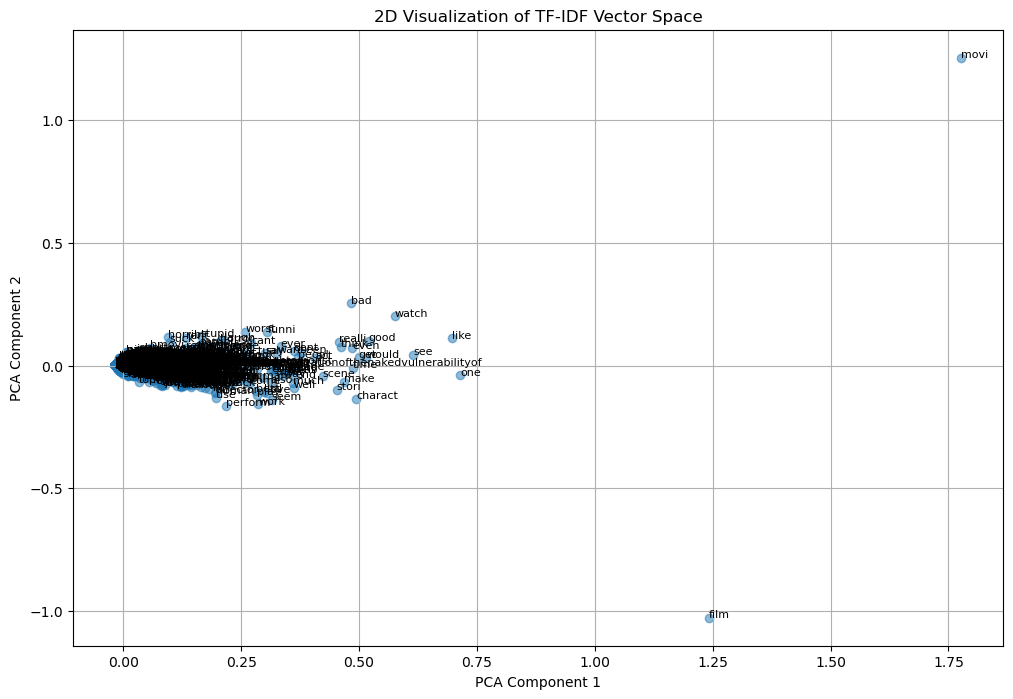

In [13]:
# Dimensionality Reduction using PCA for visualization
pca = PCA(n_components=2)
tfidf_reduced = pca.fit_transform(tfidf_matrix.T.toarray())  # Transpose to reduce word vectors

# Visualize the 2D Semantic Space
plt.figure(figsize=(12, 8))
plt.scatter(tfidf_reduced[:, 0], tfidf_reduced[:, 1], alpha=0.5)
plt.title('2D Visualization of TF-IDF Vector Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Annotating some points with feature names for clarity
for i in range(len(tfidf_df.columns)):
    plt.annotate(tfidf_df.columns[i], (tfidf_reduced[i, 0], tfidf_reduced[i, 1]), fontsize=8)

plt.grid(True)
plt.show()